# Video: Plotting Histograms with Pandas

In this video, we will explore pandas options for plotting histograms.
Pandas gives histogram special treatment compared to most plot types with a specialized `hist` function and built-in subplot support.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-omds/bu-omds-data/main/data/abalone.tsv", sep="\t")
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


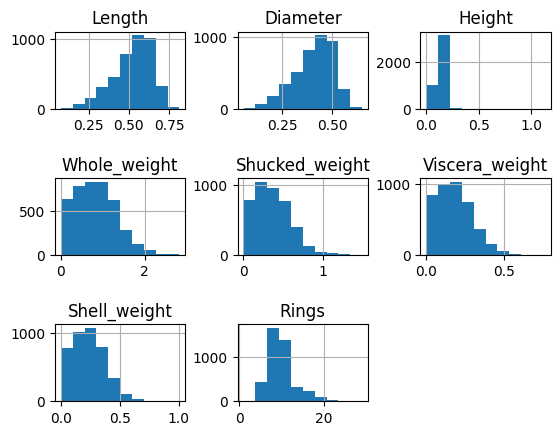

In [5]:
_ = abalone.hist()
plt.subplots_adjust(wspace=0.4, hspace=0.9)

In [ ]:
print(abalone.hist.__doc__)


    Make a histogram of the DataFrame's columns.

    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.

    .. _histogram: https://en.wikipedia.org/wiki/Histogram

    Parameters
    ----------
    data : DataFrame
        The pandas object holding the data.
    column : str or sequence, optional
        If passed, will be used to limit data to a subset of columns.
    by : object, optional
        If passed, then used to form histograms for separate groups.
    grid : bool, default True
        Whether to show axis grid lines.
    xlabelsize : int, default None
        If specified changes the x-axis label size.
    xrot : float, default None
        Rotation of x axis labels. For example, a value of 90 displays the
        x labels rotated 90 degrees clockwise.
    ylabelsize : int, default None
        If specified changes the y-axis lab

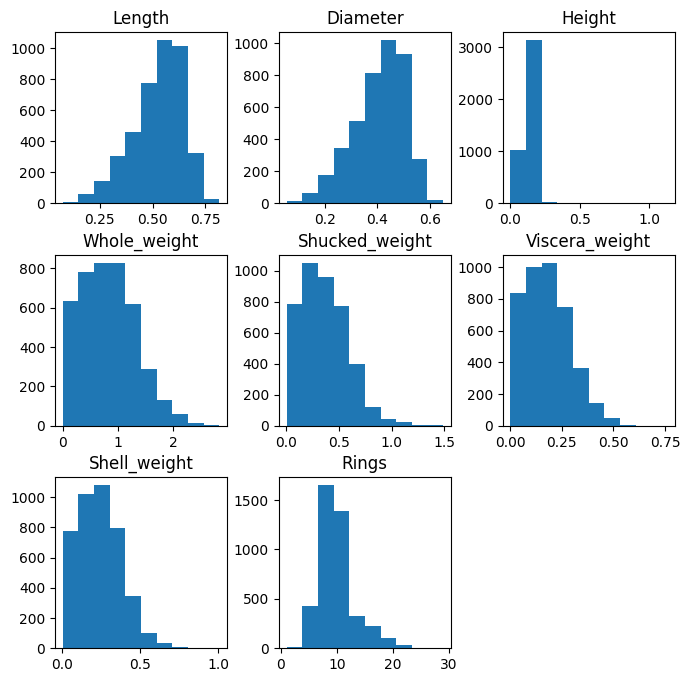

In [ ]:
_ = abalone.hist(figsize=(8, 8), grid=False)

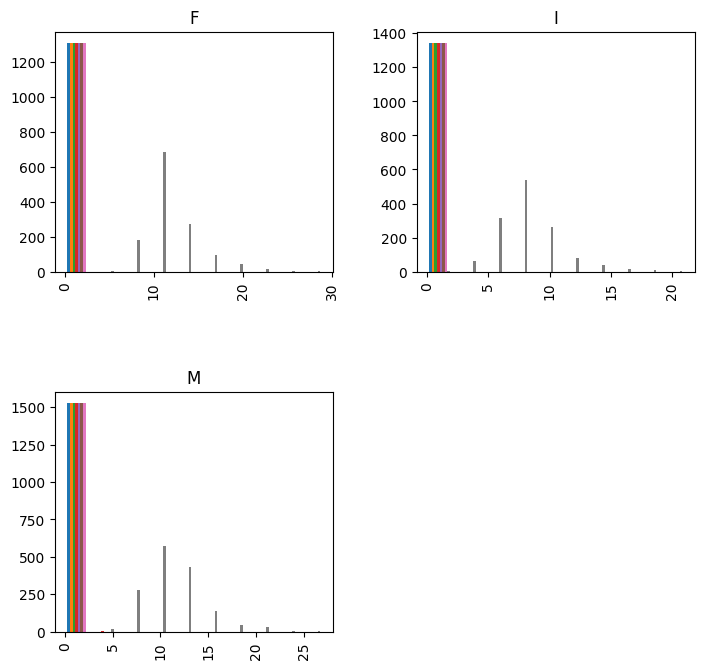

In [ ]:
_ = abalone.hist(by="Sex", figsize=(8, 8), grid=False)

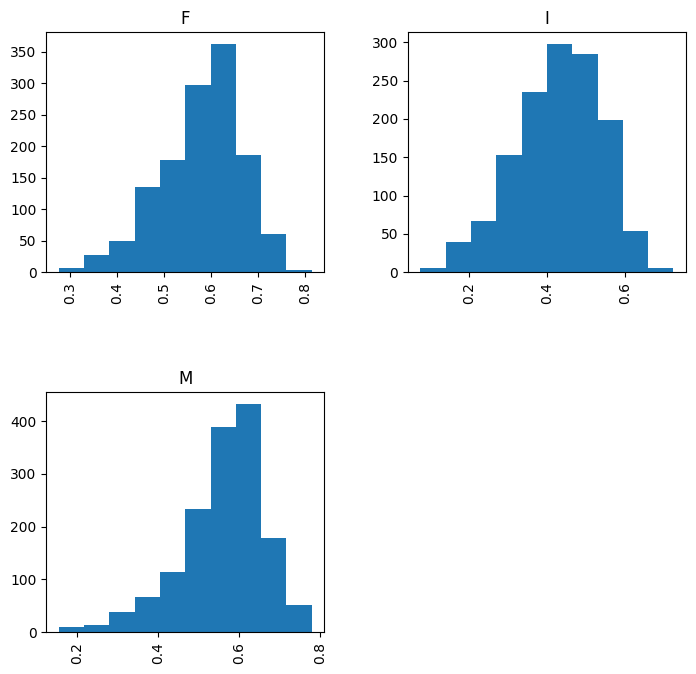

In [ ]:
_ = abalone[["Sex", "Length"]].hist(by="Sex", figsize=(8, 8), grid=False)

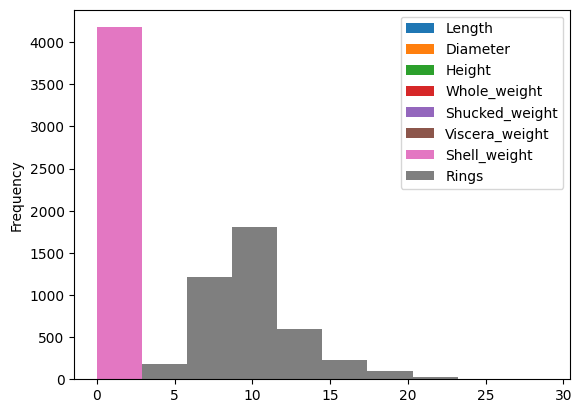

In [ ]:
_ = abalone.plot.hist()

In [ ]:
print(abalone.plot.hist.__doc__)


        Draw one histogram of the DataFrame's columns.

        A histogram is a representation of the distribution of data.
        This function groups the values of all given Series in the DataFrame
        into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
        This is useful when the DataFrame's Series are in a similar scale.

        Parameters
        ----------
        by : str or sequence, optional
            Column in the DataFrame to group by.

            .. versionchanged:: 1.4.0

               Previously, `by` is silently ignore and makes no groupings

        bins : int, default 10
            Number of histogram bins to be used.
        **kwargs
            Additional keyword arguments are documented in
            :meth:`DataFrame.plot`.

        Returns
        -------
        class:`matplotlib.AxesSubplot`
            Return a histogram plot.

        See Also
        --------
        DataFrame.hist : Draw histograms per DataFrame's Series.
    

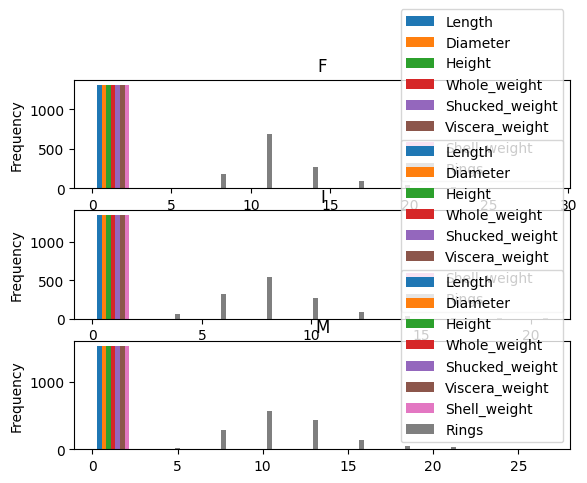

In [ ]:
_ = abalone.plot.hist("Sex")

In [ ]:
len(abalone["Length"].unique())

134

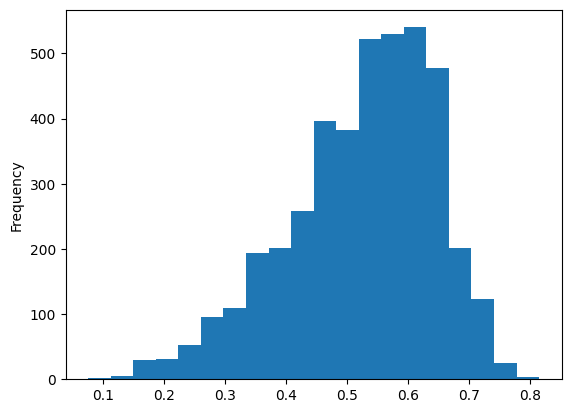

In [ ]:
_ = abalone["Length"].plot.hist(bins=20)

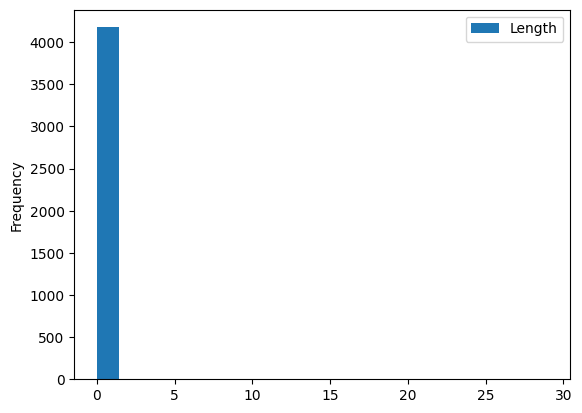

In [ ]:
_ = abalone.plot.hist(column=["Length"], bins=20)

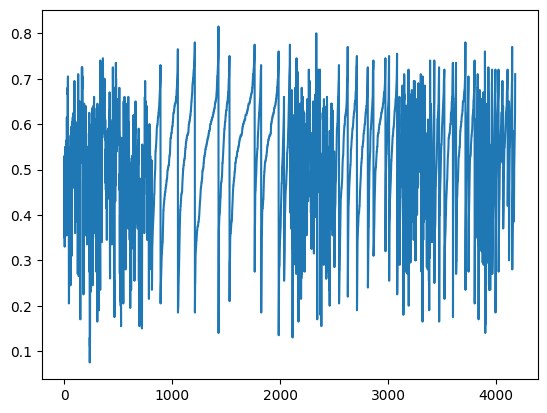

In [ ]:
_ = abalone['Length'].plot()

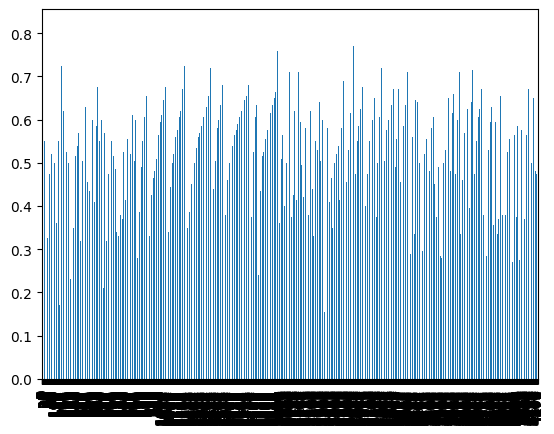

In [ ]:
_ = abalone['Length'].plot(kind='bar')

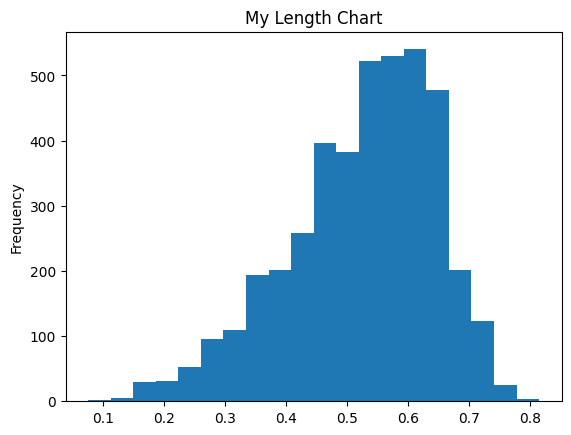

In [ ]:
_ = abalone['Length'].plot(kind='hist', bins=20, title='My Length Chart')

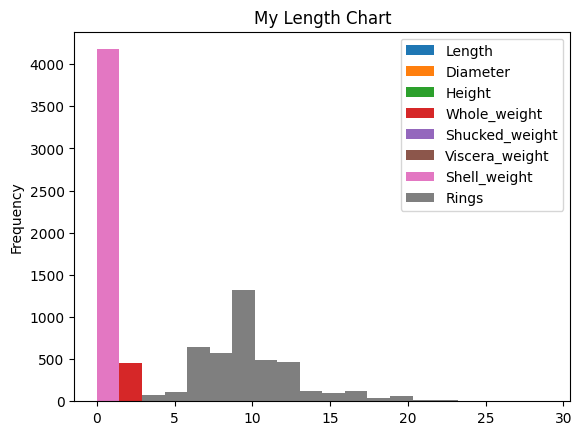

In [ ]:
_ = abalone.plot(kind='hist', bins=20, title='My Length Chart')

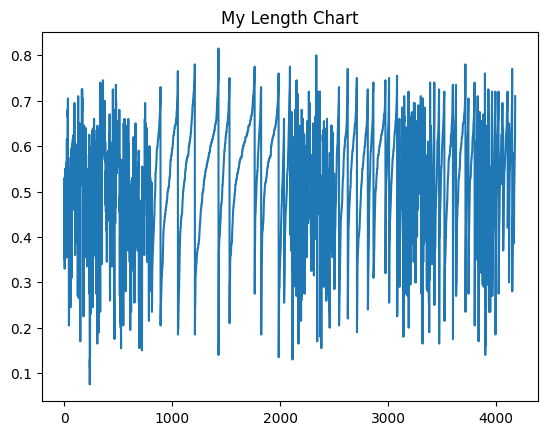

In [ ]:
_ = abalone['Length'].plot(kind='line', title='My Length Chart')

<Axes: >

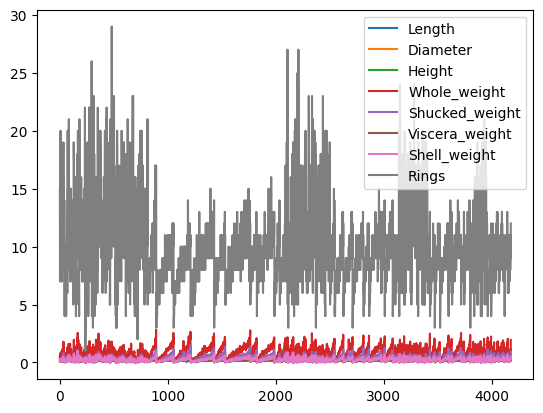

In [ ]:
abalone.plot()

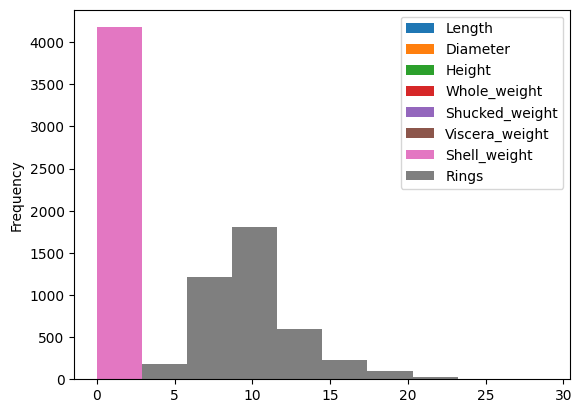

In [ ]:
_ = abalone.plot.hist()

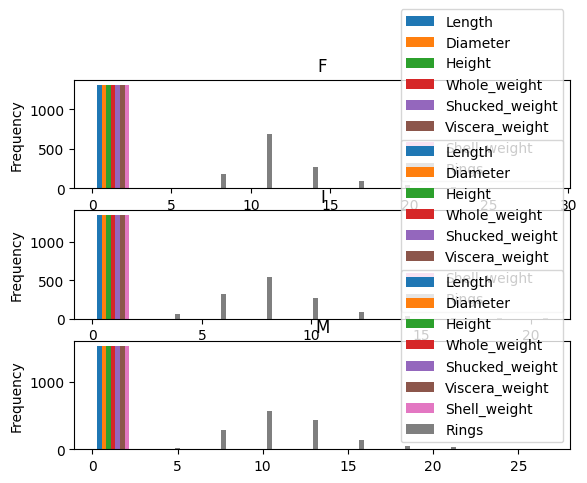

In [ ]:
_ = abalone.plot.hist("Sex")

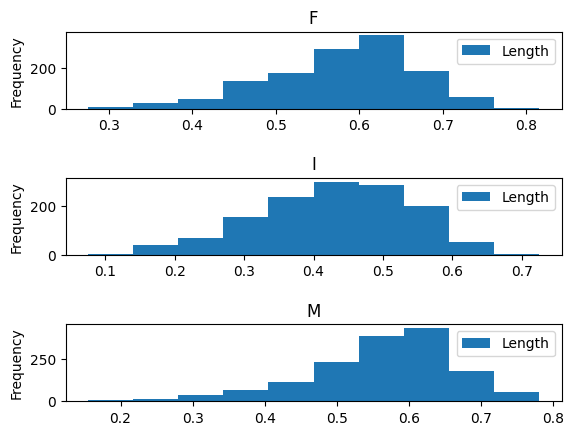

In [13]:
_ = abalone[["Sex", "Length"]].plot.hist("Sex")
plt.subplots_adjust(hspace=0.9)

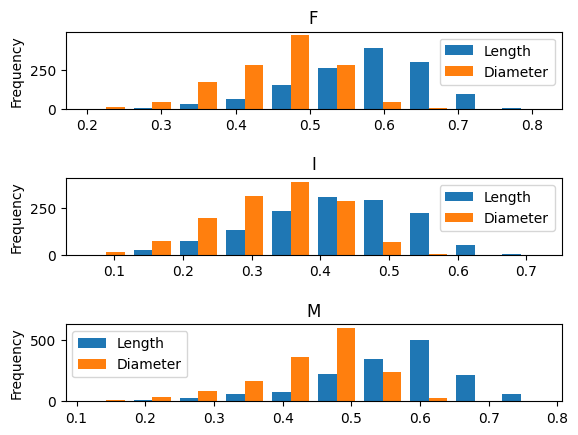

In [12]:
_ = abalone.plot.hist(column=["Length", "Diameter"], by="Sex")
plt.subplots_adjust(hspace=0.9)

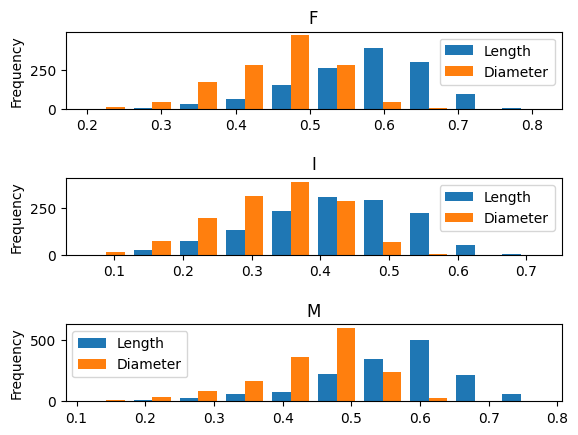

In [11]:
_ = abalone.plot.hist(column=["Length", "Diameter"], by="Sex", subplots=True)
plt.subplots_adjust(hspace=0.9)

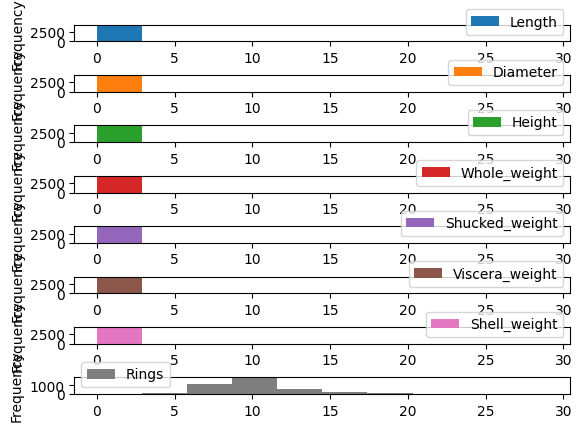

In [15]:
_ = abalone.plot(kind="hist", sharex=False, sharey=False, subplots=True)
plt.subplots_adjust(hspace=2.0)
TODO fix this up

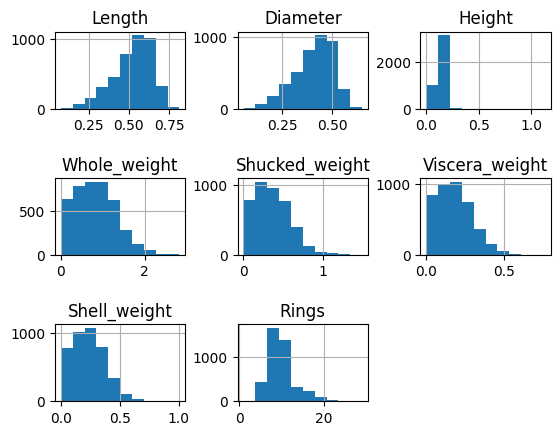

In [18]:
pd.plotting.hist_frame(abalone)
plt.subplots_adjust(wspace=0.4, hspace=0.9)
None